In [129]:

#make_barplots_for_hypergeometric_test_results
#
#Fetch information from files, then make barplots

import pandas as pd
import seaborn as sns
import matplotlib as mpl 
import math
import matplotlib.pyplot as plt

mpl.rcParams['pdf.fonttype'] = 42
sns.set(rc={'figure.figsize':(7,10)})

In [161]:
def main(data_file, output_pdf):

    data_df = pd.read_csv(data_file, sep="\t")
    r, c = data_df.shape

    result_df = pd.DataFrame(columns= ["GOterm","-logpvalue"])

    for i in range(r):
        goterm = data_df["Term"][i]
        pval = float(data_df["PValue"][i])
        if pval < 0.01:
            new_pval = -math.log(pval,10)
            result_df = result_df.append({"GOterm": goterm,"-logpvalue": new_pval}, ignore_index = True)

    result_df = result_df.sort_values('-logpvalue', ascending=False)

    # temp_df = result_df[0:20]
    result_plot = sns.barplot(x="-logpvalue", y="GOterm", color='grey', dodge=False, data=result_df)
    result_plot.axvline(x=2, color='red', linestyle='-')
    result_plot.set_xlim(1.5,3.5)


    result_plot.figure.savefig(output_pdf)

    return bar_height


0.8

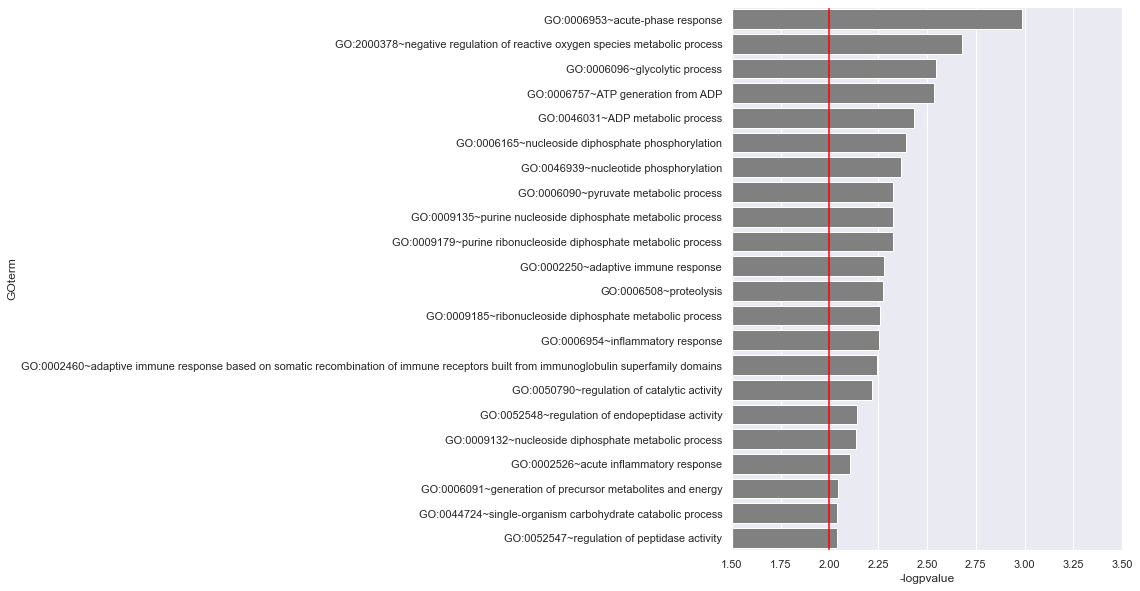

In [162]:
data_file = '../../../../analysis/statistics/gse/proteomics/gse/GSE.proteomics.cVSneg.up.clean.txt'
output_pdf = "../../../../analysis/statistics/gse/proteomics/gse/GSE.proteomics.cVSneg.up.clean.pdf"
main(data_file, output_pdf)

0.8

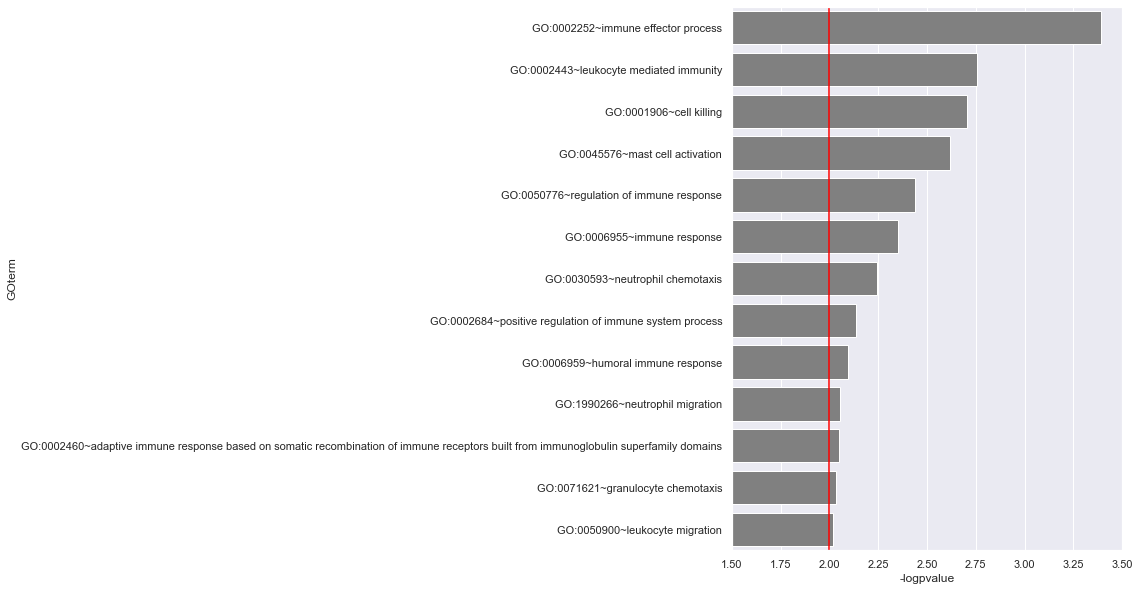

In [158]:
data_file = '../../../../analysis/statistics/gse/proteomics/gse/GSE.proteomics.cVSpos.up.clean.txt'
output_pdf = "../../../../analysis/statistics/gse/proteomics/gse/GSE.proteomics.cVSpos.up.clean.pdf"
main(data_file, output_pdf)